In [92]:
import destvi_utils
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import scvi
from scvi.model import CondSCVI, DestVI
import pandas as pd

In [93]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

Global seed set to 0


Last run with scvi-tools version: 1.0.3


In [94]:
sc.set_figure_params(figsize=(4, 4), frameon=False)

In [95]:
PATH = "/home/pedrovideira/Desktop/spatial_ovary_new-main/Ovary_v4/data/Resultados/"

In [96]:
from Read_files import read_free_h5ad

In [97]:
st_adata = sc.read_h5ad("/home/pedrovideira/Desktop/spatial_ovary_new-main/Ovary_v4/data/Resultados/GEO_files/PP_GEO5.h5ad")
st_adata.var_names_make_unique()

In [98]:
#st_adata = st_adata.write_h5ad("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v4\\\data\\10x2.h5ad")

In [99]:
#st_adata = sc.read_h5ad("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\projeto_INCA\\\spatial_ovary\\Ovary_v4\\data\\10x2.h5ad")

In [100]:
st_adata.layers["counts"] = st_adata.X.copy()
st_adata.obsm["spatial"] = st_adata.obsm["spatial"]
st_adata.raw = st_adata

In [101]:
#I have done the 0.1 filtration and extraction of the underexpressed celltype
#sc_adata = sc.read_h5ad("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v4\\data\\cellxgene_ovc_subset_raw.h5ad")

In [102]:
st_adata.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 580 × 15910
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'>

In [103]:
st_adata.var.head(5)

gene_ids    feature_types     mt  n_cells_by_counts  \
ENSG00000237491  LINC01409  Gene Expression  False                 47   
ENSG00000228794  LINC01128  Gene Expression  False                 70   
ENSG00000225880  LINC00115  Gene Expression  False                 18   
ENSG00000188976      NOC2L  Gene Expression  False                258   
ENSG00000187961     KLHL17  Gene Expression  False                154   

                 mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
ENSG00000237491     0.085284           0.081842              92.140468   
ENSG00000228794     0.137124           0.128502              88.294314   
ENSG00000225880     0.030100           0.029656              96.989967   
ENSG00000188976     0.720736           0.542752              56.856187   
ENSG00000187961     0.302676           0.264420              74.247492   

                 total_counts  log1p_total_counts  n_cells  highly_variable  \
ENSG00000237491          51.0            3.951244       44            False   
ENSG00000228794          82.0            4.418840       64             True   
ENSG00000225880          18.0            2.944439       18            False   
ENSG00000188976         431.0            6.068426      245            False   
ENSG00000187961         181.0            5.204007      147            False   

                    means  dispersions  dispersions_norm  
ENSG00000237491  0.491523     2.992474          0.921962  
ENSG00000228794  0.747727     3.300520          1.781333  
ENSG00000225880  0.215713     2.471595          0.004358  
ENSG00000188976  1.749551     2.538700         -0.920500  
ENSG00000187961  1.237090     2.774552          0.290469

In [104]:
#sc_adata = sc_adata.to_memory()

In [105]:
sc_adata = sc.read_h5ad("/home/pedrovideira/Desktop/spatial_ovary_new-main/Ovary_v4/data/Resultados/snOvaryAnno_30102023.h5ad")
sc_adata.var_names_make_unique()

In [106]:
st_adata.var.head(3)

gene_ids    feature_types     mt  n_cells_by_counts  \
ENSG00000237491  LINC01409  Gene Expression  False                 47   
ENSG00000228794  LINC01128  Gene Expression  False                 70   
ENSG00000225880  LINC00115  Gene Expression  False                 18   

                 mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
ENSG00000237491     0.085284           0.081842              92.140468   
ENSG00000228794     0.137124           0.128502              88.294314   
ENSG00000225880     0.030100           0.029656              96.989967   

                 total_counts  log1p_total_counts  n_cells  highly_variable  \
ENSG00000237491          51.0            3.951244       44            False   
ENSG00000228794          82.0            4.418840       64             True   
ENSG00000225880          18.0            2.944439       18            False   

                    means  dispersions  dispersions_norm  
ENSG00000237491  0.491523     2.992474          0.921962  
ENSG00000228794  0.747727     3.300520          1.781333  
ENSG00000225880  0.215713     2.471595          0.004358

In [107]:
sc_adata.var.head(3)

name
SAMD11  SAMD11
NOC2L    NOC2L
KLHL17  KLHL17

In [108]:
# genes = sc_adata.var
# genes.columns = ["gene_ids"]

In [109]:
# let us filter some genes
G = 3000
sc.pp.filter_genes(sc_adata, min_counts=10)

sc_adata.layers["counts"] = sc_adata.X.copy()

sc.pp.highly_variable_genes(
    sc_adata, n_top_genes=G, subset=True, layer="counts", flavor="seurat_v3"
)

sc.pp.normalize_total(sc_adata, target_sum=10e4)
sc.pp.log1p(sc_adata)
sc_adata.raw = sc_adata

In [110]:
st_adata.var.index

Index(['ENSG00000237491', 'ENSG00000228794', 'ENSG00000225880',
       'ENSG00000188976', 'ENSG00000187961', 'ENSG00000187583',
       'ENSG00000272512', 'ENSG00000188290', 'ENSG00000187608',
       'ENSG00000188157',
       ...
       'ENSG00000198786', 'ENSG00000198695', 'ENSG00000198727',
       'ENSG00000278704', 'ENSG00000277400', 'ENSG00000274847',
       'ENSG00000276256', 'ENSG00000276345', 'ENSG00000273554',
       'ENSG00000278817'],
      dtype='object', length=15910)

In [111]:
st_adata.var.index = st_adata.var["gene_ids"].to_list()

In [112]:
sc_adata.var_names_make_unique()
st_adata.var_names_make_unique()

In [113]:
# filter genes to be the same on the spatial data
intersect = np.intersect1d(sc_adata.var.index, st_adata.var.index)
st_adata = st_adata[:, intersect].copy()
sc_adata = sc_adata[:, intersect].copy()
G = len(intersect)

In [114]:
G

2044

In [115]:
sc_adata.layers["counts"] = sc_adata.X.copy()


In [116]:
sc_adata.var.head()

name  n_counts  highly_variable  highly_variable_rank     means  \
A2M        A2M    7190.0             True                 208.0  0.154461   
A2ML1    A2ML1    3230.0             True                 957.0  0.069389   
AADAC    AADAC    3316.0             True                2114.0  0.071237   
ABCA1    ABCA1   16621.0             True                2268.0  0.357065   
ABCA10  ABCA10    6397.0             True                1400.0  0.137425   

        variances  variances_norm  
A2M      0.323525        1.609348  
A2ML1    0.127049        1.324342  
AADAC    0.116176        1.182389  
ABCA1    0.509629        1.169973  
ABCA10   0.225872        1.252894

In [117]:
sc_adata.obs.head(3)

orig.ident  nCount_RNA  nFeature_RNA patient  percent.mt  \
AAACAAGCAAAGGTAA-1-0   sn_ovary      4142.0          2790     SN1    0.120715   
AAACAAGCACATACCT-1-0   sn_ovary      5664.0          3518     SN1    0.017655   
AAACAAGCATAGGGTC-1-0   sn_ovary      4244.0          2761     SN1    0.023563   

                     out_count out_feature          ident  dbl_score  \
AAACAAGCAAAGGTAA-1-0     FALSE       FALSE  SeuratProject   0.206897   
AAACAAGCACATACCT-1-0     FALSE       FALSE  SeuratProject   0.073403   
AAACAAGCATAGGGTC-1-0     FALSE       FALSE  SeuratProject   0.051875   

                      threshold  ... leiden_0.6  leiden_0.7  leiden_0.8  \
AAACAAGCAAAGGTAA-1-0    0.56385  ...          2           6           6   
AAACAAGCACATACCT-1-0    0.56385  ...          0           0           0   
AAACAAGCATAGGGTC-1-0    0.56385  ...          5           3           5   

                     leiden_0.9 leiden_1       celltype decontX_contamination  \
AAACAAGCAAAGGTAA-1-0          0        9  Ovarian Cells              0.021200   
AAACAAGCACATACCT-1-0          1        1  Ovarian Cells              0.009755   
AAACAAGCATAGGGTC-1-0          0        7  Ovarian Cells              0.040922   

                     decontX_clusters batch n_genes  
AAACAAGCAAAGGTAA-1-0                1     0  2787.0  
AAACAAGCACATACCT-1-0                1     0  3513.0  
AAACAAGCATAGGGTC-1-0                1     0  2751.0  

[3 rows x 26 columns]

In [118]:
import scipy.sparse as sp

In [119]:
st_adata.layers["counts"] = sp.csr_matrix(st_adata.layers["counts"])

In [120]:
sc_adata.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 46549 × 2044
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient', 'percent.mt', 'out_count', 'out_feature', 'ident', 'dbl_score', 'threshold', 'out_dbl', 'X_scvi_batch', 'X_scvi_labels', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1', 'celltype', 'decontX_contamination', 'decontX_clusters', 'batch', 'n_genes'
    var: 'name', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p'
    obsm: 'X_umap'
    layers: 'counts'>

In [121]:
CondSCVI.setup_anndata(sc_adata, layer="counts", labels_key="celltype")

/home/pedrovideira/mambaforge/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/home/pedrovideira/mambaforge/lib/python3.10/site-packages/scvi/data/fields/_layer_field.py:101: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  _verify_and_correct_data_format(adata, self.attr_name, self.attr_key)


In [122]:
sc_adata.obs.head(5)

orig.ident  nCount_RNA  nFeature_RNA patient  percent.mt  \
AAACAAGCAAAGGTAA-1-0   sn_ovary      4142.0          2790     SN1    0.120715   
AAACAAGCACATACCT-1-0   sn_ovary      5664.0          3518     SN1    0.017655   
AAACAAGCATAGGGTC-1-0   sn_ovary      4244.0          2761     SN1    0.023563   
AAACAAGCATCGGGCA-1-0   sn_ovary      3818.0          2604     SN1    0.130959   
AAACAAGCATGAGTCA-1-0   sn_ovary      6684.0          3702     SN1    0.299222   

                     out_count out_feature          ident  dbl_score  \
AAACAAGCAAAGGTAA-1-0     FALSE       FALSE  SeuratProject   0.206897   
AAACAAGCACATACCT-1-0     FALSE       FALSE  SeuratProject   0.073403   
AAACAAGCATAGGGTC-1-0     FALSE       FALSE  SeuratProject   0.051875   
AAACAAGCATCGGGCA-1-0     FALSE       FALSE  SeuratProject   0.183246   
AAACAAGCATGAGTCA-1-0     FALSE       FALSE  SeuratProject   0.198516   

                      threshold  ... leiden_0.7  leiden_0.8  leiden_0.9  \
AAACAAGCAAAGGTAA-1-0    0.56385  ...          6           6           0   
AAACAAGCACATACCT-1-0    0.56385  ...          0           0           1   
AAACAAGCATAGGGTC-1-0    0.56385  ...          3           5           0   
AAACAAGCATCGGGCA-1-0    0.56385  ...          0           0           1   
AAACAAGCATGAGTCA-1-0    0.56385  ...          0           0           1   

                     leiden_1       celltype decontX_contamination  \
AAACAAGCAAAGGTAA-1-0        9  Ovarian Cells              0.021200   
AAACAAGCACATACCT-1-0        1  Ovarian Cells              0.009755   
AAACAAGCATAGGGTC-1-0        7  Ovarian Cells              0.040922   
AAACAAGCATCGGGCA-1-0        2  Ovarian Cells              0.069575   
AAACAAGCATGAGTCA-1-0        1  Ovarian Cells              0.036958   

                     decontX_clusters batch n_genes _scvi_labels  
AAACAAGCAAAGGTAA-1-0                1     0  2787.0            4  
AAACAAGCACATACCT-1-0                1     0  3513.0            4  
AAACAAGCATAGGGTC-1-0                1     0  2751.0            4  
AAACAAGCATCGGGCA-1-0                1     0  2585.0            4  
AAACAAGCATGAGTCA-1-0                1     0  3688.0            4  

[5 rows x 27 columns]

In [123]:
sc_model = CondSCVI(sc_adata, weight_obs=False)
sc_model.view_anndata_setup()

Anndata setup with scvi-tools version 1.0.3.

Setup via `CondSCVI.setup_anndata` with arguments:

{'labels_key': 'celltype', 'layer': 'counts'}

     Summary Statistics     
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Summary Stat Key ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│     n_cells      │ 46549 │
│     n_labels     │   9   │
│      n_vars      │ 2044  │
└──────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │  adata.layers['counts']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                            labels State Registry                            
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location    ┃         Categories          ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['celltype'] │    Fallopian Tube Cells     │          0          │
│                       │ Lymphatic Endothelial Cells │          1          │
│                       │      Mesenchymal Cells      │          2          │
│                       │   Mononuclear Phagocytes    │          3          │
│                       │        Ovarian Cells        │          4          │
│                       │     Perivascular Cells      │          5          │
│                       │       Plasma B Cells        │          6          │
│                       │         T/NK Cells          │          7          │
│                       │ Vascular Endothelial Cells  │          8          │
└───────────────────────┴─────────────────────────────┴─────────────────────┘

In [124]:
sc_model.train(max_epochs = 500)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 500/500: 100%|██████████| 500/500 [1:24:41<00:00, 10.13s/it, v_num=1, train_loss_step=1.12e+3, train_loss_epoch=1.09e+3]

`Trainer.fit` stopped: `max_epochs=500` reached.


Epoch 500/500: 100%|██████████| 500/500 [1:24:41<00:00, 10.16s/it, v_num=1, train_loss_step=1.12e+3, train_loss_epoch=1.09e+3]


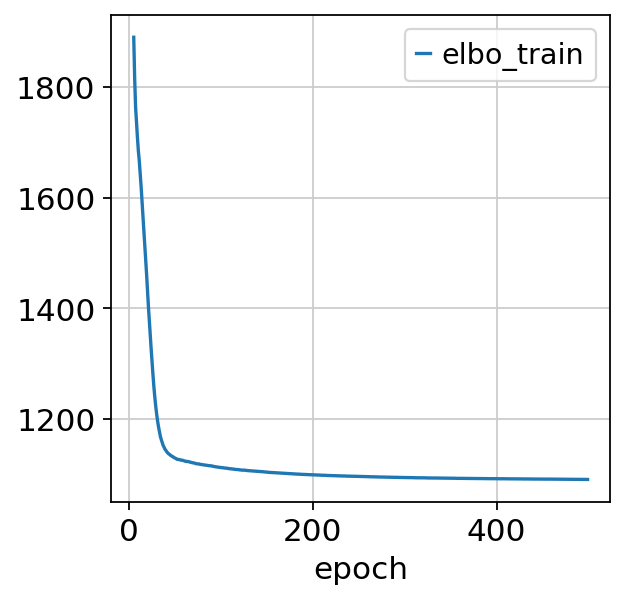

In [125]:
sc_model.history["elbo_train"].iloc[5:].plot()
plt.show()

In [126]:
DestVI.setup_anndata(st_adata, layer="counts")

/home/pedrovideira/mambaforge/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [127]:
st_model = DestVI.from_rna_model(st_adata, sc_model)
st_model.view_anndata_setup()

Anndata setup with scvi-tools version 1.0.3.

Setup via `DestVI.setup_anndata` with arguments:

{'layer': 'counts'}

     Summary Statistics     
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Summary Stat Key ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│     n_cells      │  580  │
│      n_vars      │ 2044  │
└──────────────────┴───────┘

              Data Registry              
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃  scvi-tools Location   ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │ adata.layers['counts'] │
│    ind_x     │ adata.obs['_indices']  │
└──────────────┴────────────────────────┘

In [128]:
st_model.train(max_epochs=500) # número diminuído devido a demora em carregar

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/pedrovideira/mambaforge/lib/python3.10/site-packages/lightning/pytorch/loops/fit_loop.py:281: PossibleUserWarning: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 500/500: 100%|██████████| 500/500 [00:22<00:00, 21.98it/s, v_num=1, train_loss_step=1.12e+6, train_loss_epoch=1.16e+6]

`Trainer.fit` stopped: `max_epochs=500` reached.


Epoch 500/500: 100%|██████████| 500/500 [00:22<00:00, 22.41it/s, v_num=1, train_loss_step=1.12e+6, train_loss_epoch=1.16e+6]


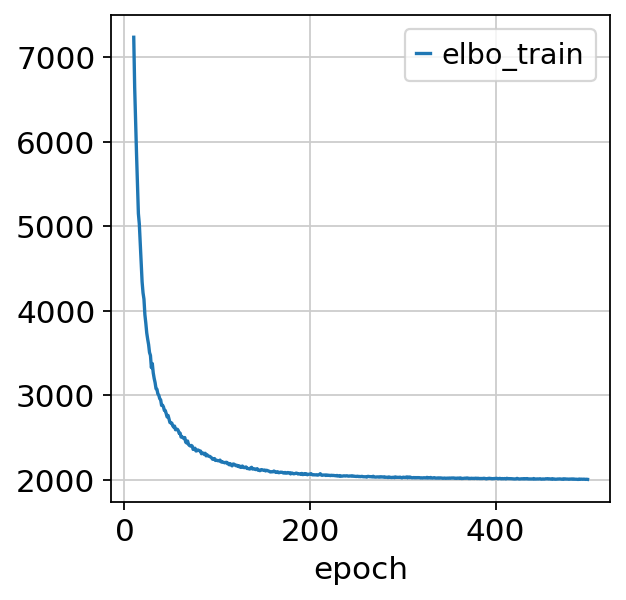

In [129]:
st_model.history["elbo_train"].iloc[10:].plot()
plt.show()

In [130]:
st_adata.obsm["proportions"] = st_model.get_proportions()

In [131]:
st_adata.obsm["proportions"].head(5)

Fallopian Tube Cells  Lymphatic Endothelial Cells  \
CGAGGAGCTTCCATAT-1              0.125975                     0.030157   
ACGATCATACATAGAG-1              0.125606                     0.030722   
ATGCATGATCCAGGAT-1              0.124939                     0.031335   
AGTCTTCTCCTCAAAT-1              0.125049                     0.031292   
GATTCCCTTGTCGCAG-1              0.125716                     0.030595   

                    Mesenchymal Cells  Mononuclear Phagocytes  Ovarian Cells  \
CGAGGAGCTTCCATAT-1           0.264245                0.135552       0.256410   
ACGATCATACATAGAG-1           0.262364                0.136867       0.254858   
ATGCATGATCCAGGAT-1           0.260503                0.138578       0.253000   
AGTCTTCTCCTCAAAT-1           0.260930                0.138359       0.253199   
GATTCCCTTGTCGCAG-1           0.262472                0.136803       0.255035   

                    Perivascular Cells  Plasma B Cells  T/NK Cells  \
CGAGGAGCTTCCATAT-1            0.002302        0.012891    0.119290   
ACGATCATACATAGAG-1            0.002302        0.012975    0.120480   
ATGCATGATCCAGGAT-1            0.002308        0.013078    0.121763   
AGTCTTCTCCTCAAAT-1            0.002311        0.013028    0.121430   
GATTCCCTTGTCGCAG-1            0.002304        0.012975    0.120354   

                    Vascular Endothelial Cells  
CGAGGAGCTTCCATAT-1                    0.053178  
ACGATCATACATAGAG-1                    0.053828  
ATGCATGATCCAGGAT-1                    0.054498  
AGTCTTCTCCTCAAAT-1                    0.054401  
GATTCCCTTGTCGCAG-1                    0.053746

In [132]:
tipos_cell = ["Fallopian Tube Cells", "Lymphatic Endothelial Cells", "Mesenchymal Cells", "Mononuclear Phagocytes", "Ovarian Cells", "Perivascular Cells", "Plasma B Cells", "T/NK Cells", "Vascular Endothelial Cells"]

In [133]:
ct_list = tipos_cell
for ct in ct_list:
    data = st_adata.obsm["proportions"][ct].values
    st_adata.obs[ct] = np.clip(data, 0, np.quantile(data, 0.99))

In [134]:
ct_list = tipos_cell
for ct in ct_list:
    data = st_adata.obsm["proportions"][ct].values
    st_adata.obs[ct] = np.clip(data, 0, np.quantile(data, 0.99))

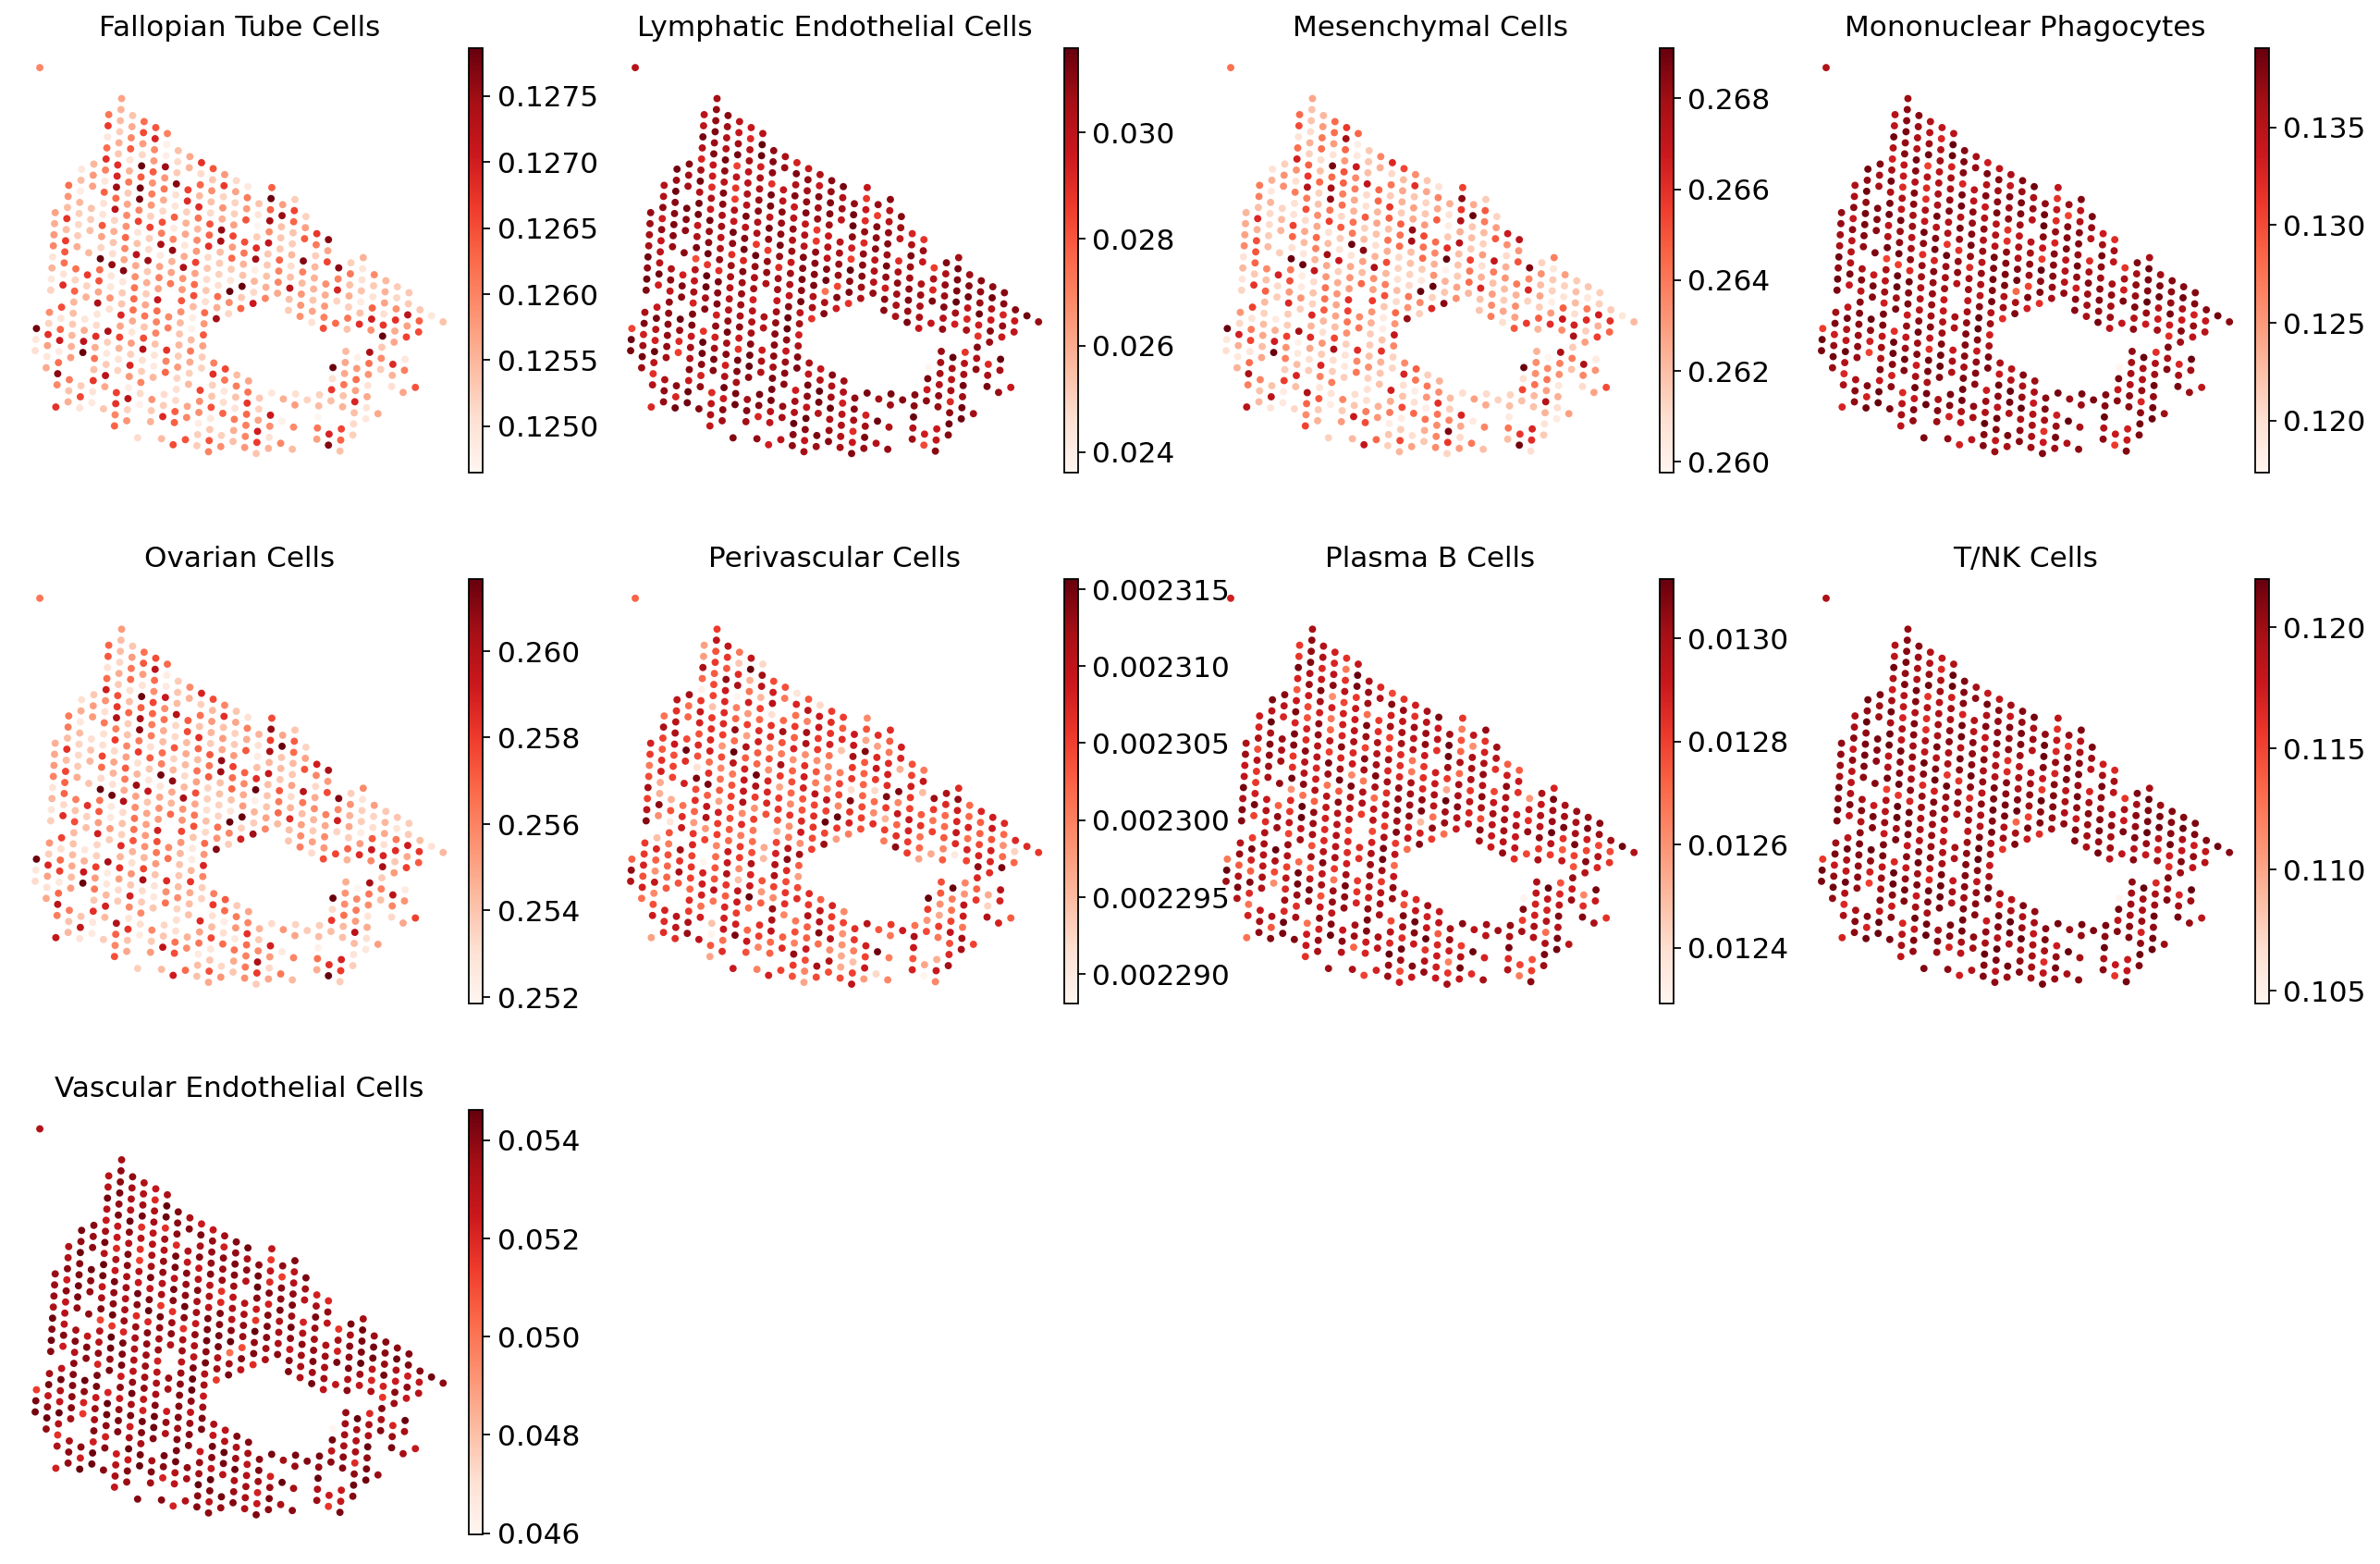

In [135]:
sc.pl.embedding(st_adata, basis="spatial", color=ct_list, cmap="Reds", s=50)

In [136]:
st_adata.write_h5ad("/home/pedrovideira/Desktop/spatial_ovary_new-main/Ovary_v4/data/Resultados/Decon/sn_GEO5_raw.h5ad")

100%|██████████| 100/100 [00:00<00:00, 240.77it/s]
/home/pedrovideira/mambaforge/lib/python3.10/site-packages/destvi_utils/_destvi_utils.py:121: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.9])


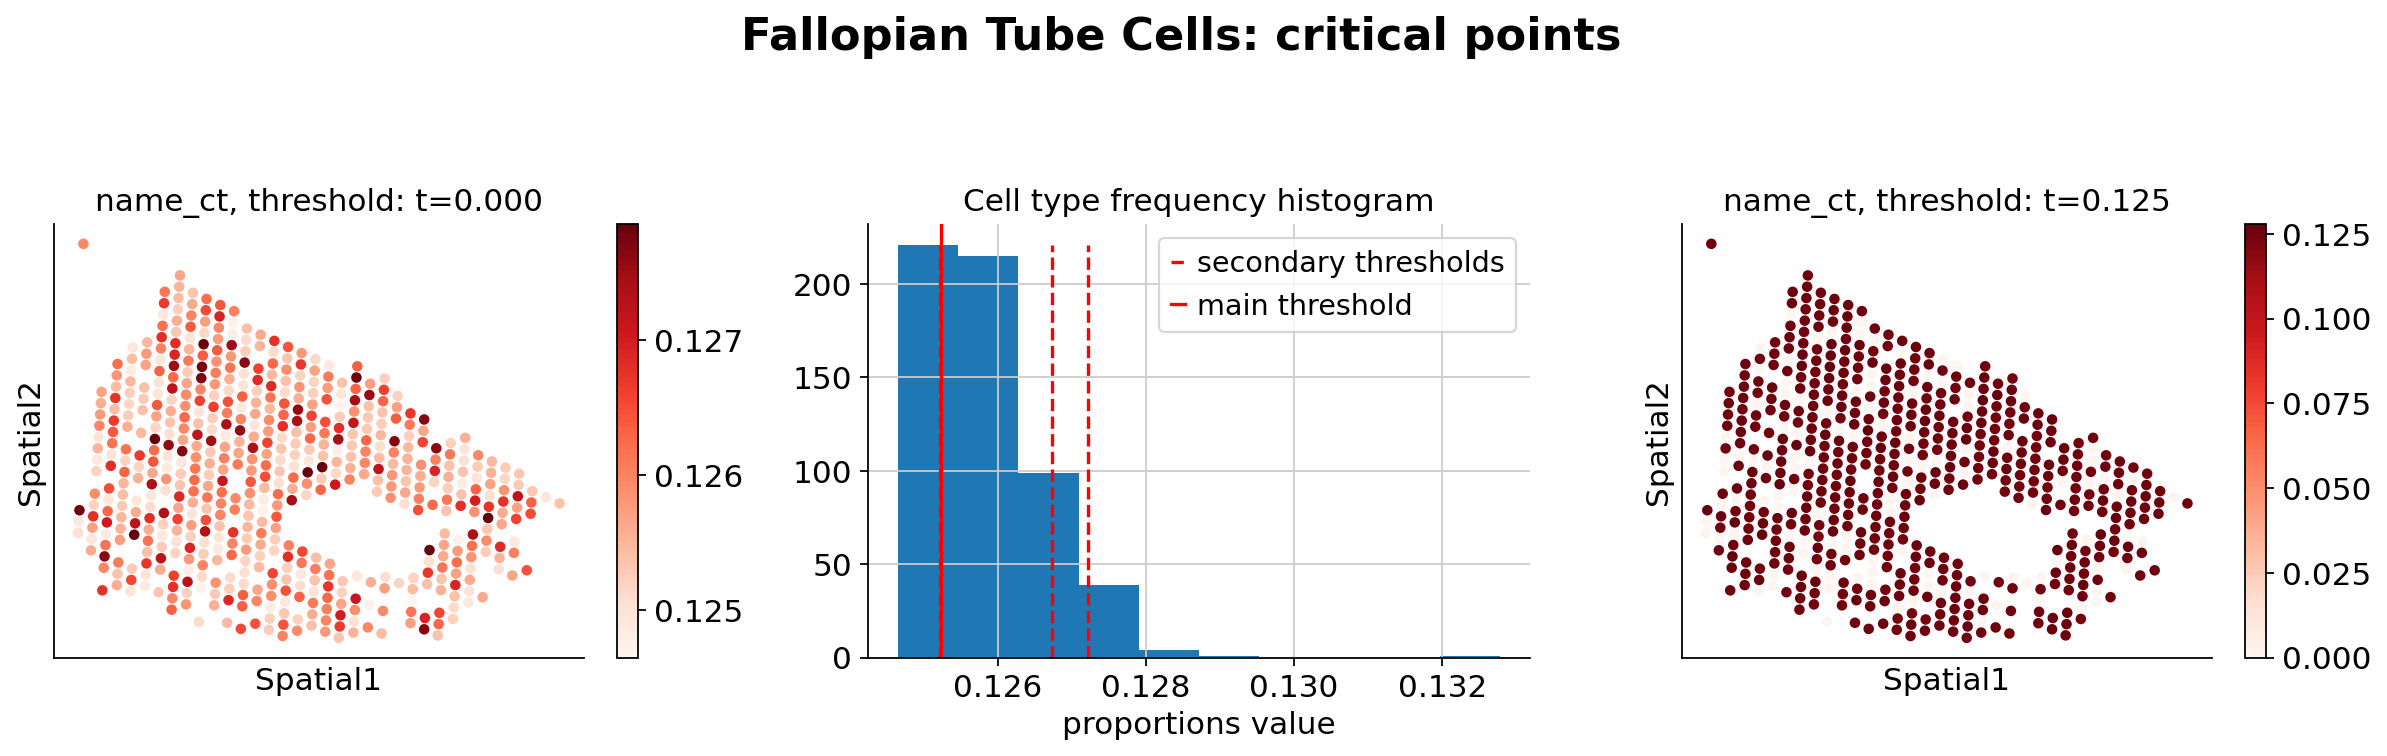

100%|██████████| 100/100 [00:00<00:00, 26635.58it/s]
/home/pedrovideira/mambaforge/lib/python3.10/site-packages/destvi_utils/_destvi_utils.py:121: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.9])


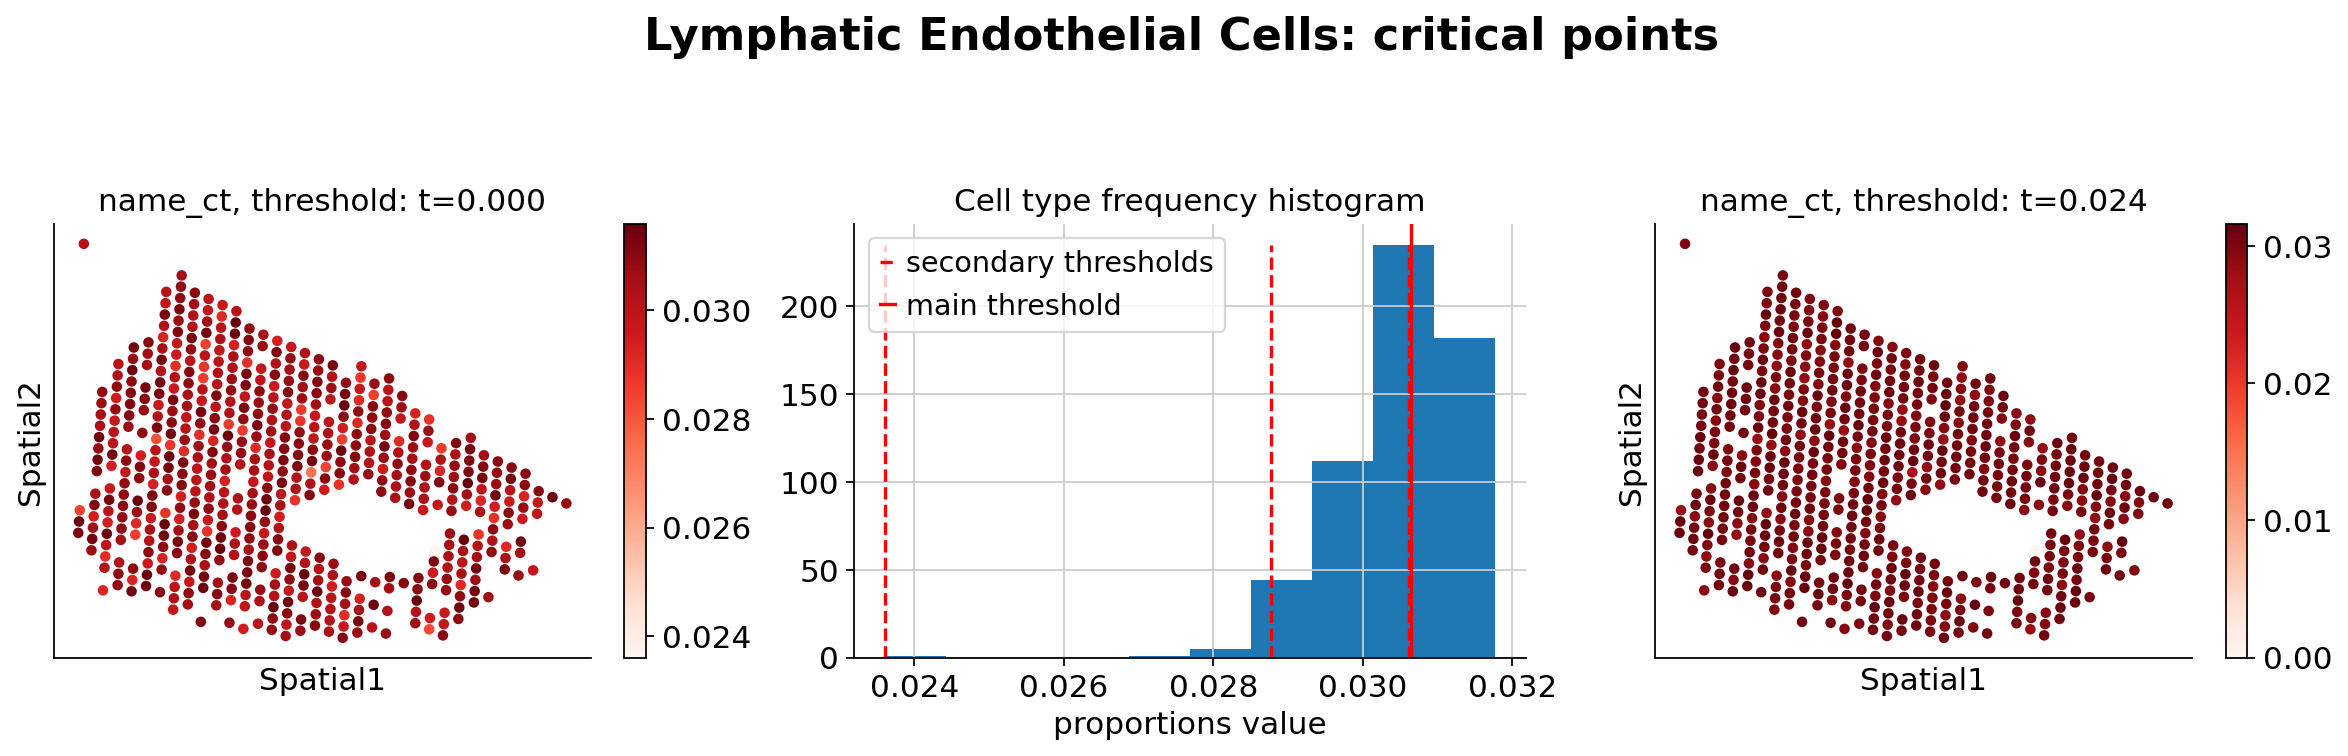

100%|██████████| 100/100 [00:00<00:00, 20537.16it/s]
/home/pedrovideira/mambaforge/lib/python3.10/site-packages/destvi_utils/_destvi_utils.py:121: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.9])


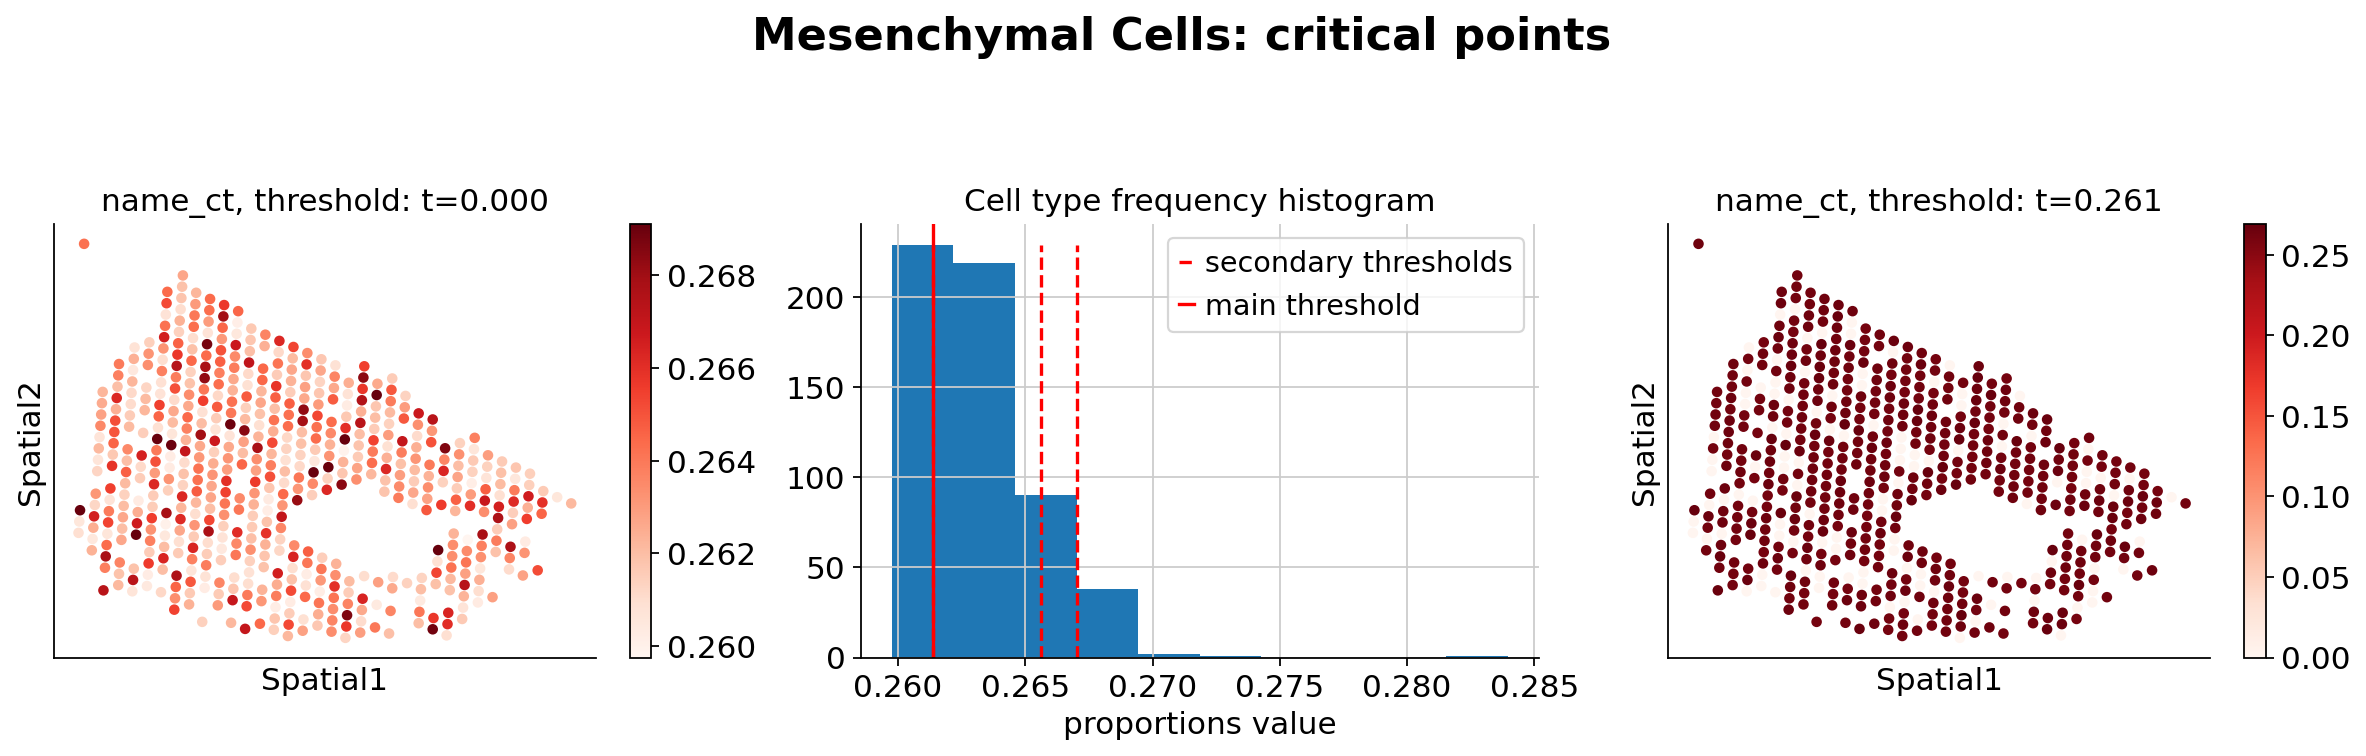

100%|██████████| 100/100 [00:00<00:00, 36151.56it/s]
/home/pedrovideira/mambaforge/lib/python3.10/site-packages/destvi_utils/_destvi_utils.py:121: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.9])


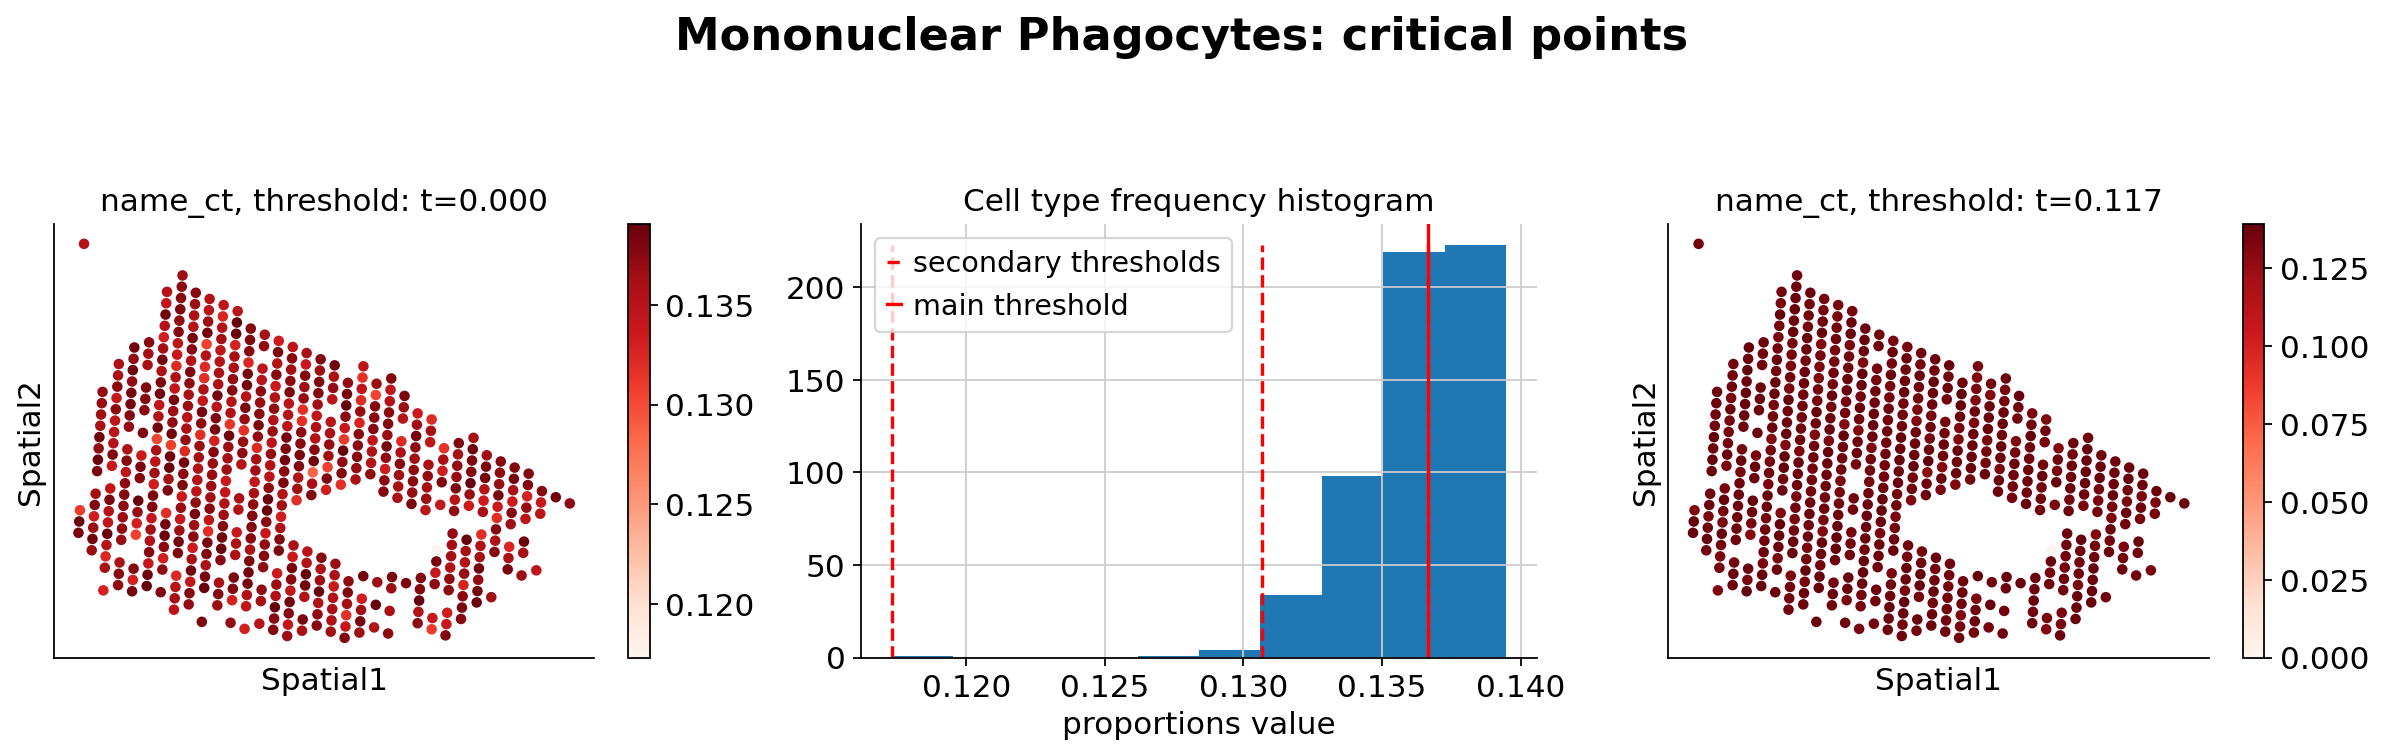

100%|██████████| 100/100 [00:00<00:00, 29304.16it/s]
/home/pedrovideira/mambaforge/lib/python3.10/site-packages/destvi_utils/_destvi_utils.py:121: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.9])


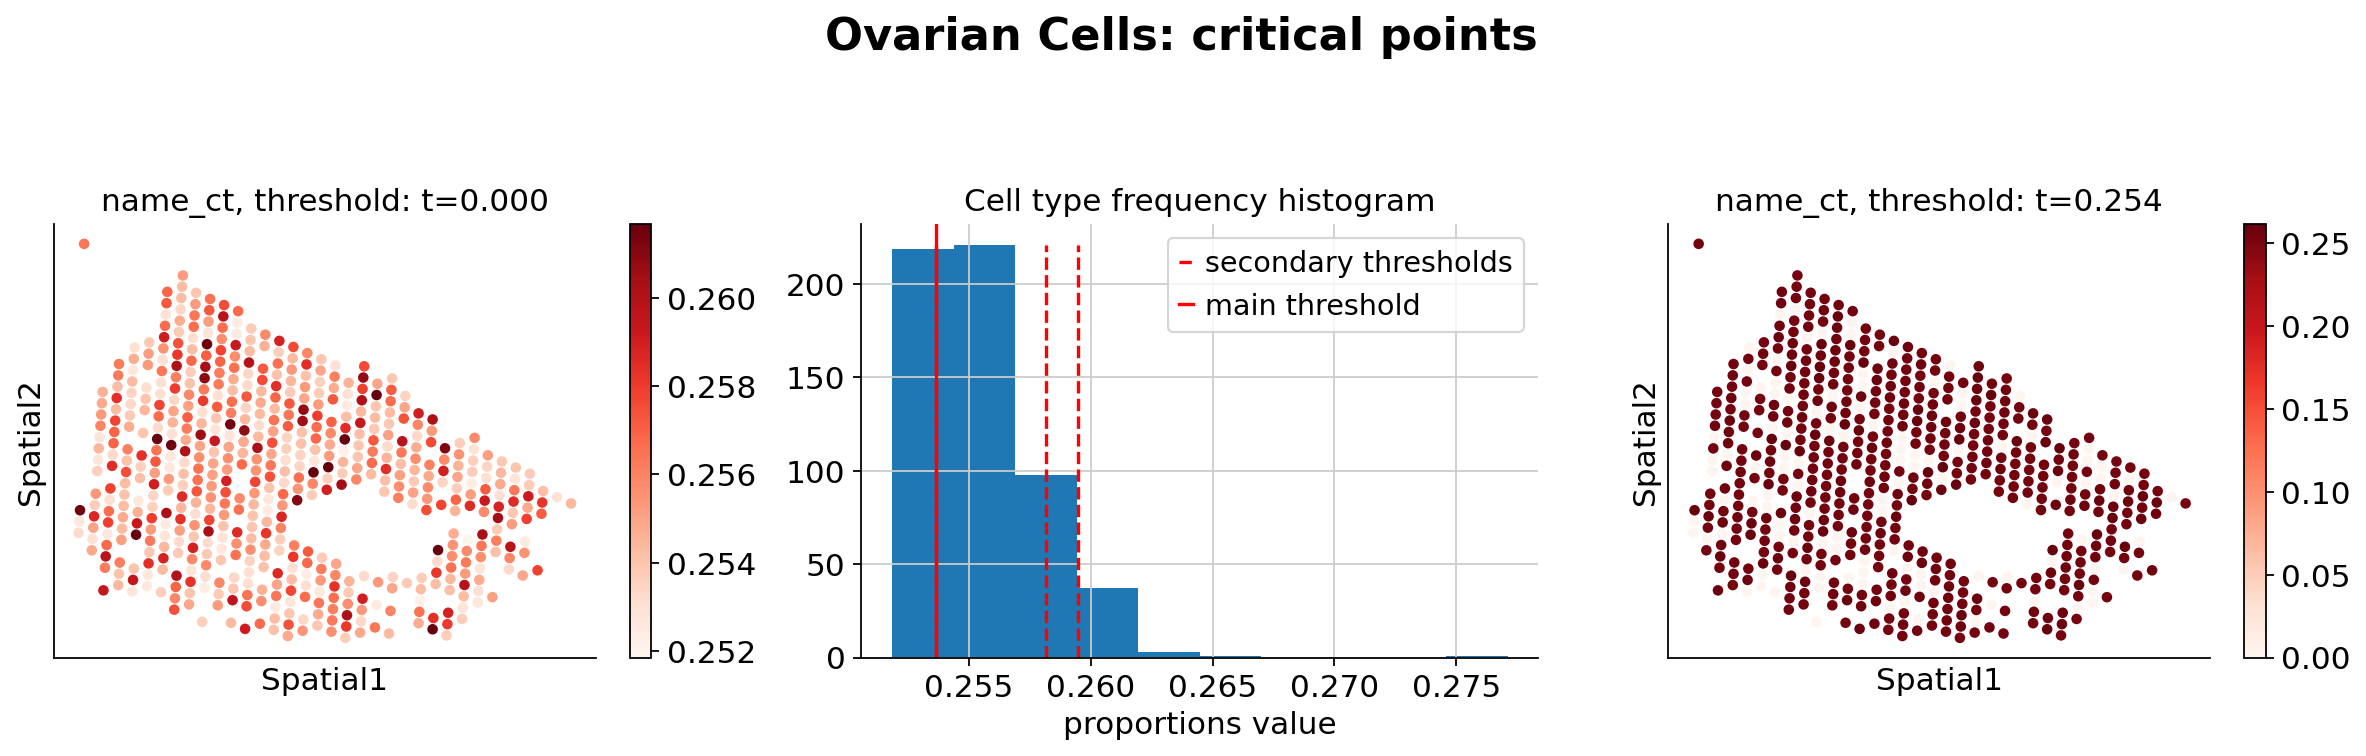

100%|██████████| 100/100 [00:00<00:00, 35937.83it/s]
/home/pedrovideira/mambaforge/lib/python3.10/site-packages/destvi_utils/_destvi_utils.py:121: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.9])


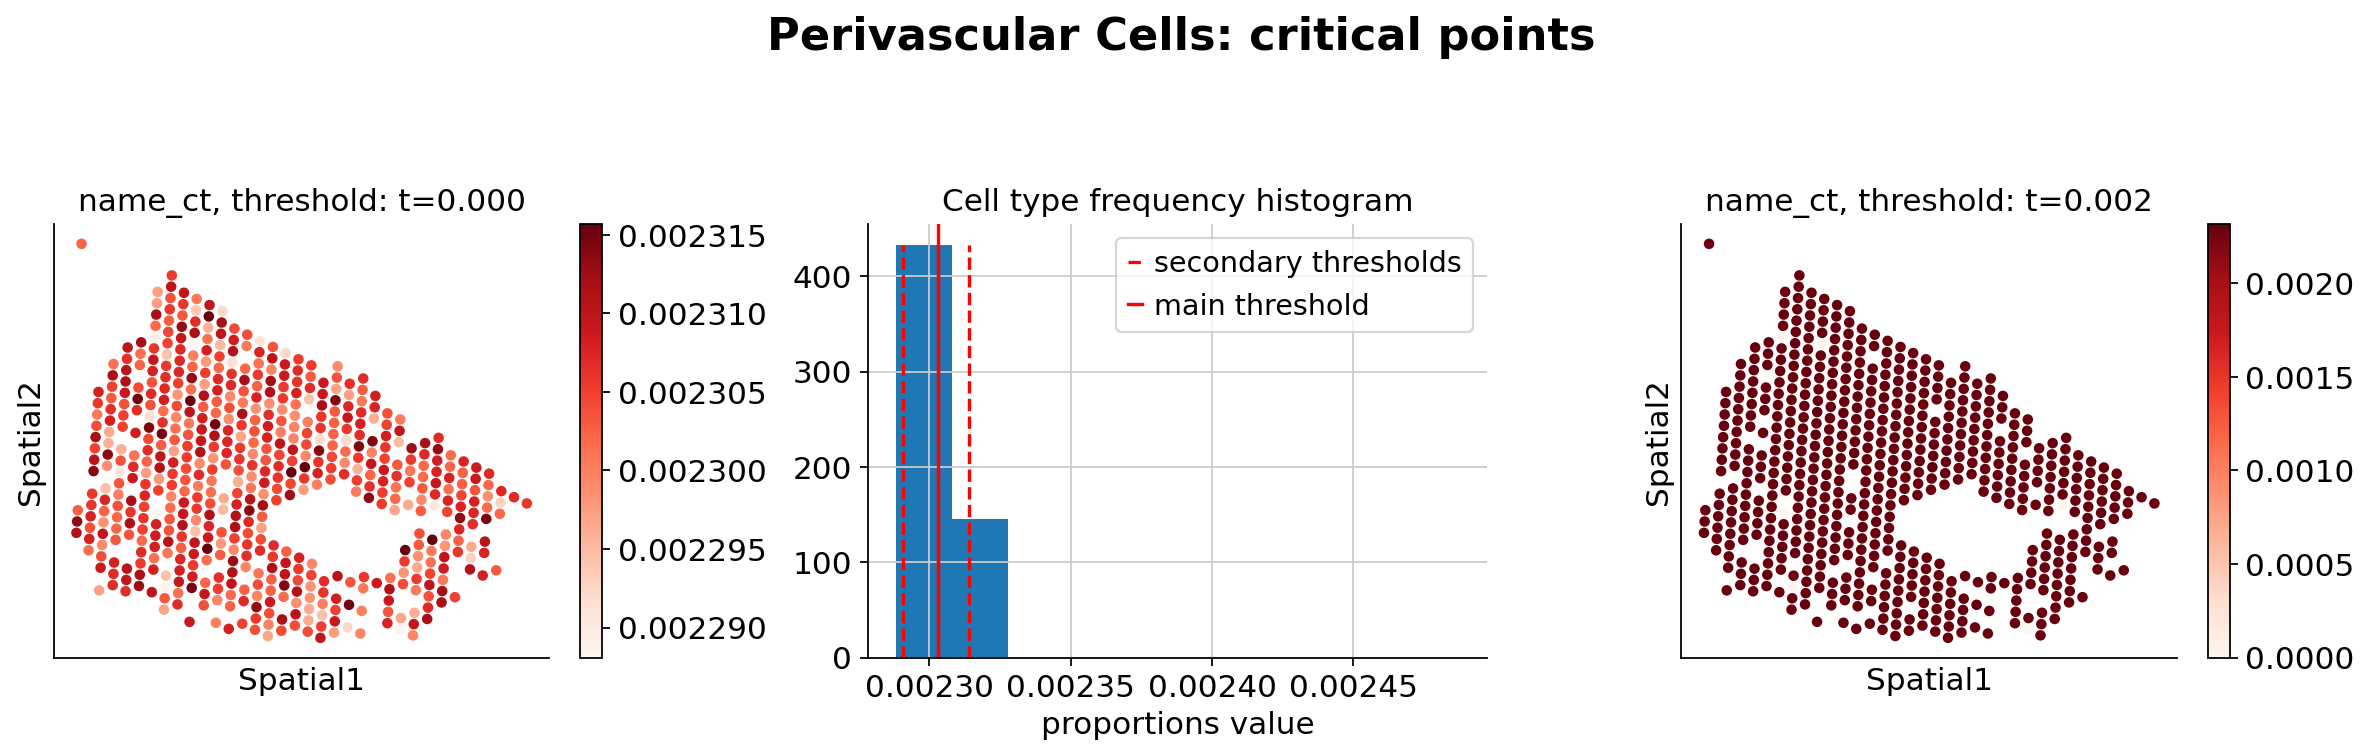

100%|██████████| 100/100 [00:00<00:00, 35181.21it/s]
/home/pedrovideira/mambaforge/lib/python3.10/site-packages/destvi_utils/_destvi_utils.py:121: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.9])


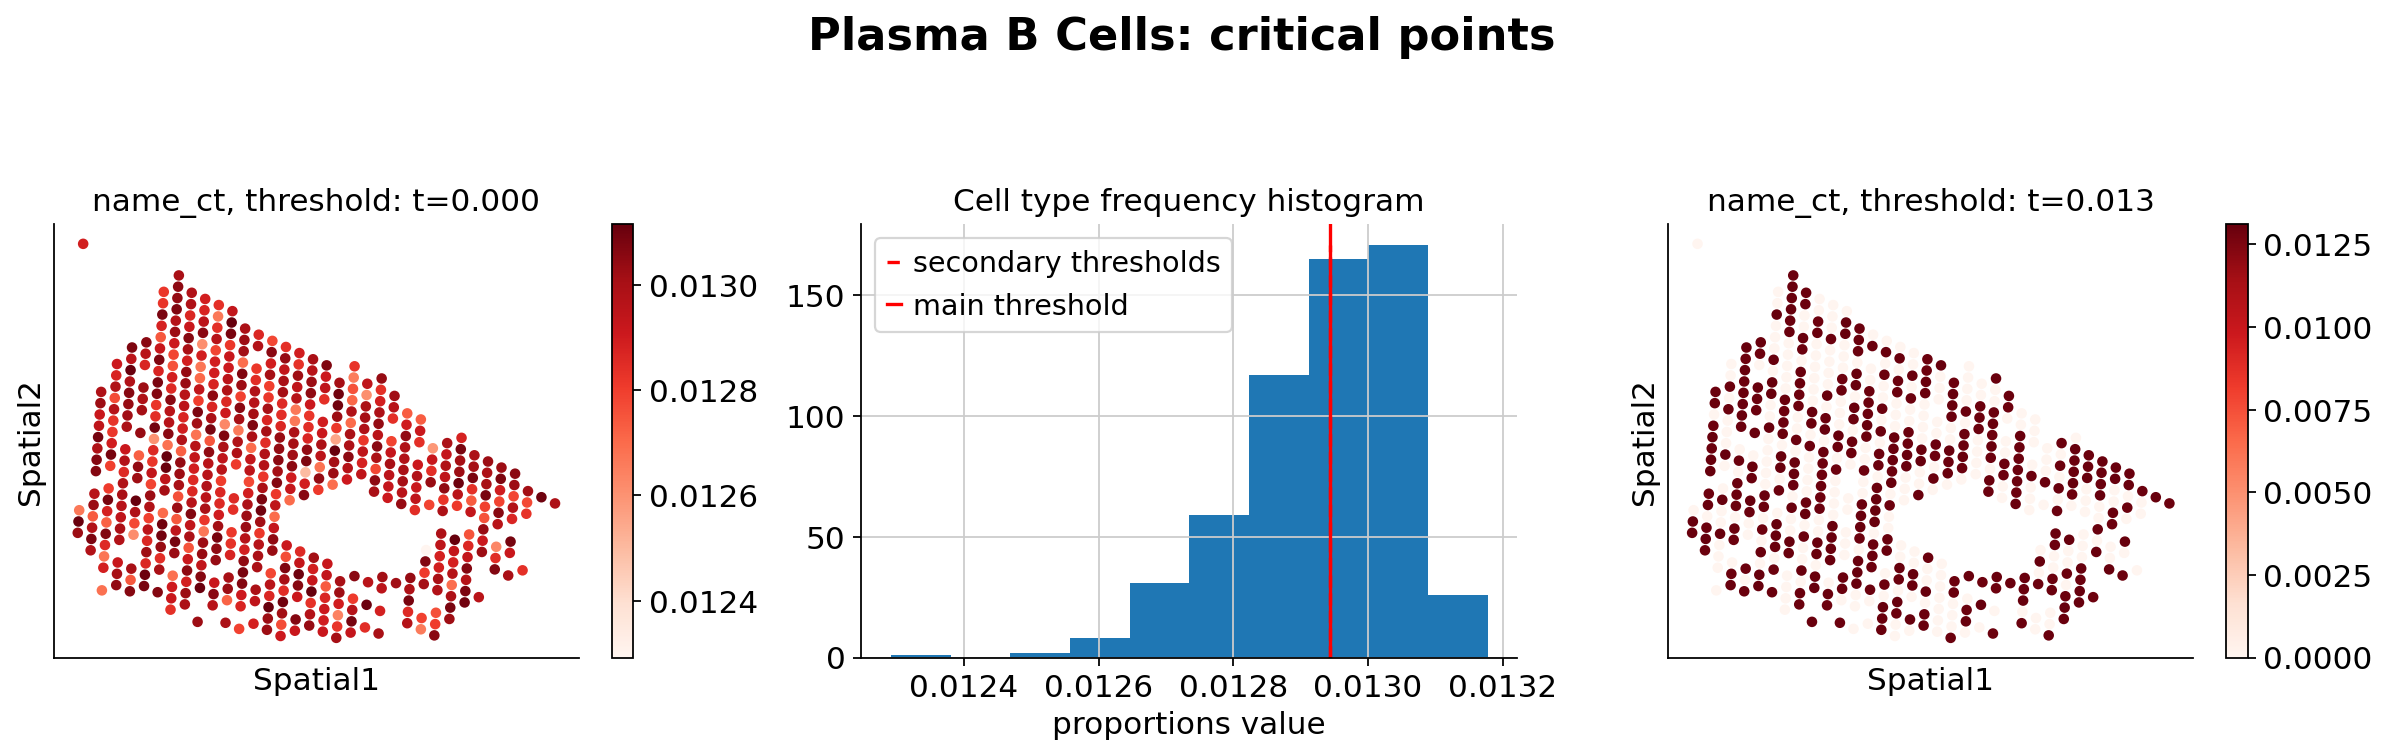

100%|██████████| 100/100 [00:00<00:00, 32054.29it/s]
/home/pedrovideira/mambaforge/lib/python3.10/site-packages/destvi_utils/_destvi_utils.py:121: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.9])


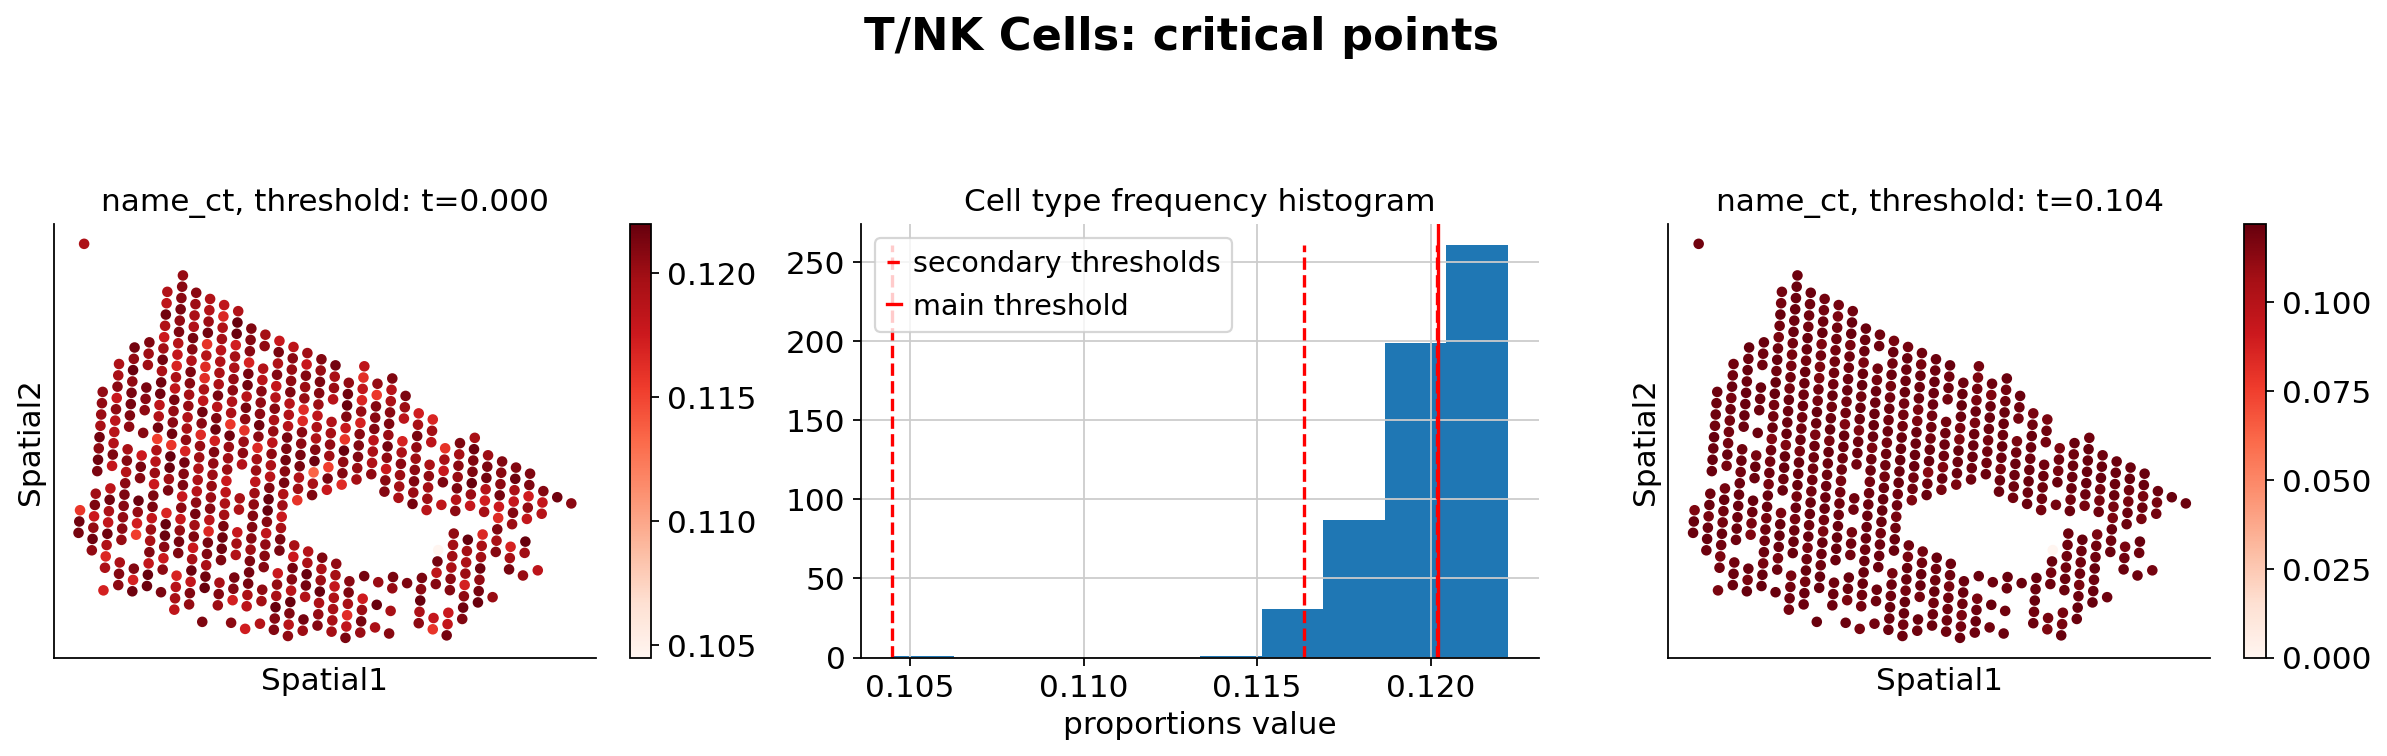

100%|██████████| 100/100 [00:00<00:00, 34807.50it/s]
/home/pedrovideira/mambaforge/lib/python3.10/site-packages/destvi_utils/_destvi_utils.py:121: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.9])


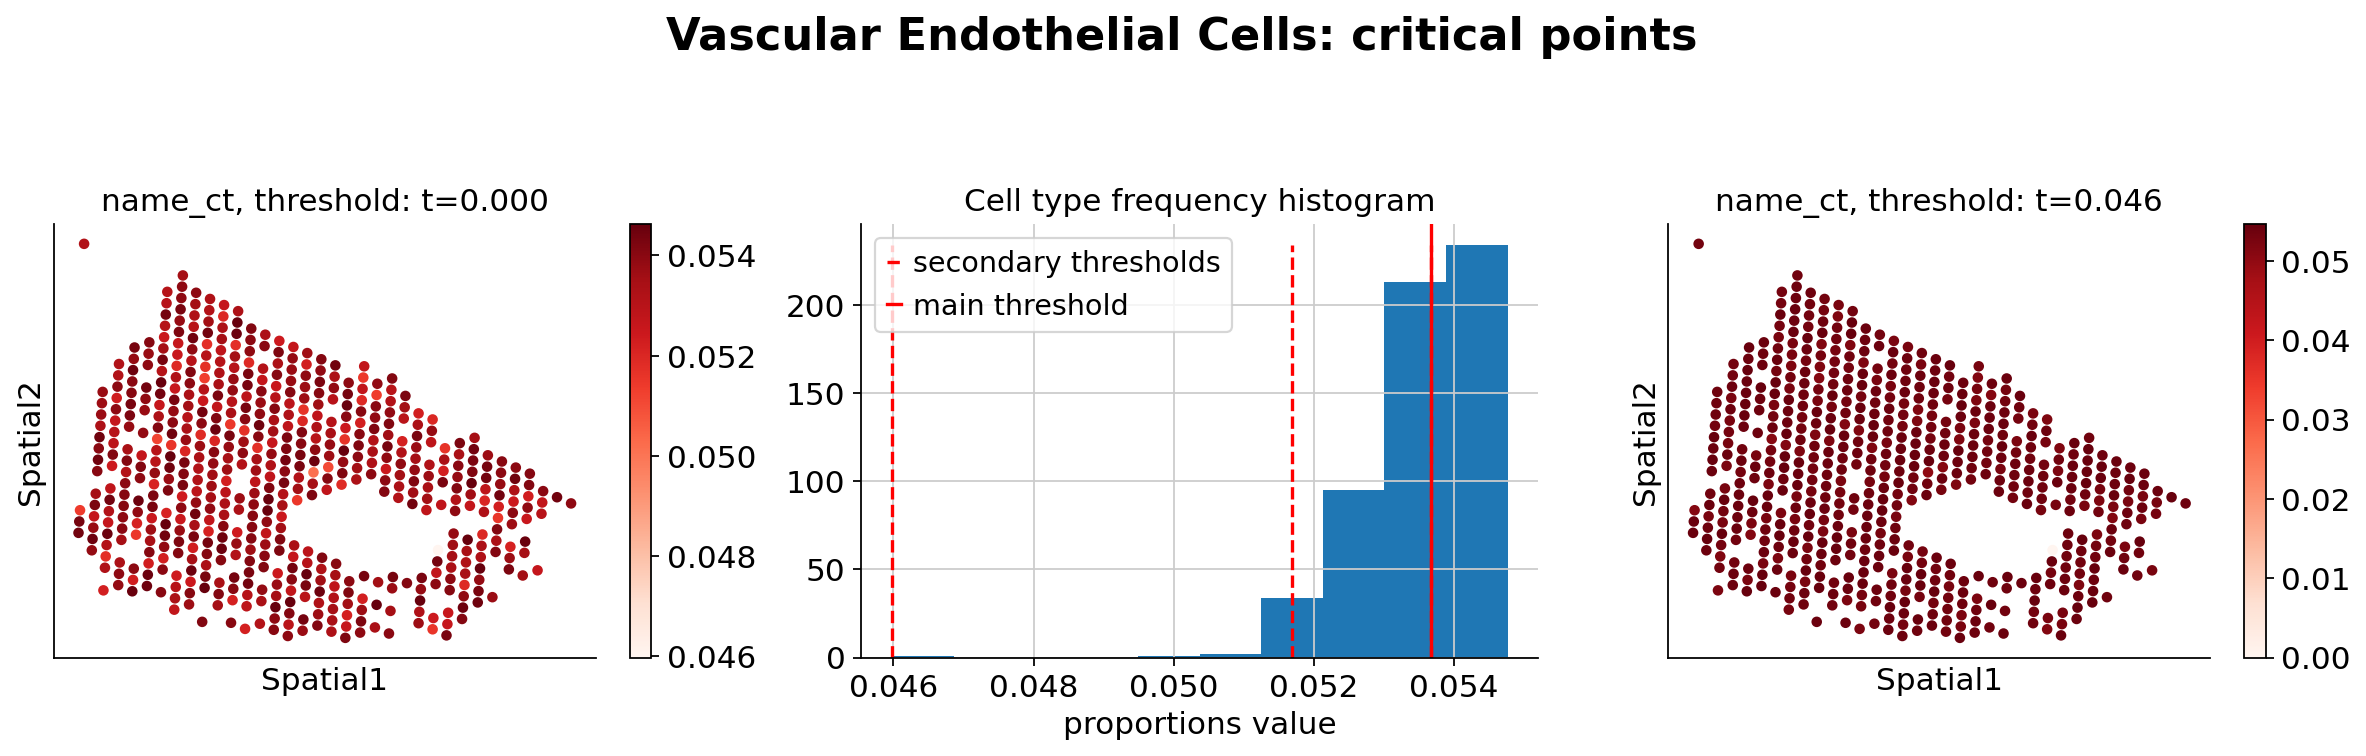

In [137]:
ct_thresholds = destvi_utils.automatic_proportion_threshold(
    st_adata, ct_list=ct_list, kind_threshold="secondary"
)

In [138]:
proportions = st_model.get_proportions()
st_adata.obsm["proportions"] = proportions

In [139]:
st_adata.obs['B cell'] = st_adata.obsm['proportions']['B cell']
sc.pl.spatial(st_adata, color="B cell", spot_size=130, color_map="Greys_r")

KeyError: 'B cell'

In [ ]:
st_adata.write("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v4\\data\\10x2_anot80.h5ad")

In [ ]:
gamma = st_model.get_gamma()["B cell"]
st_adata.obsm["B_cell_gamma"] = gamma

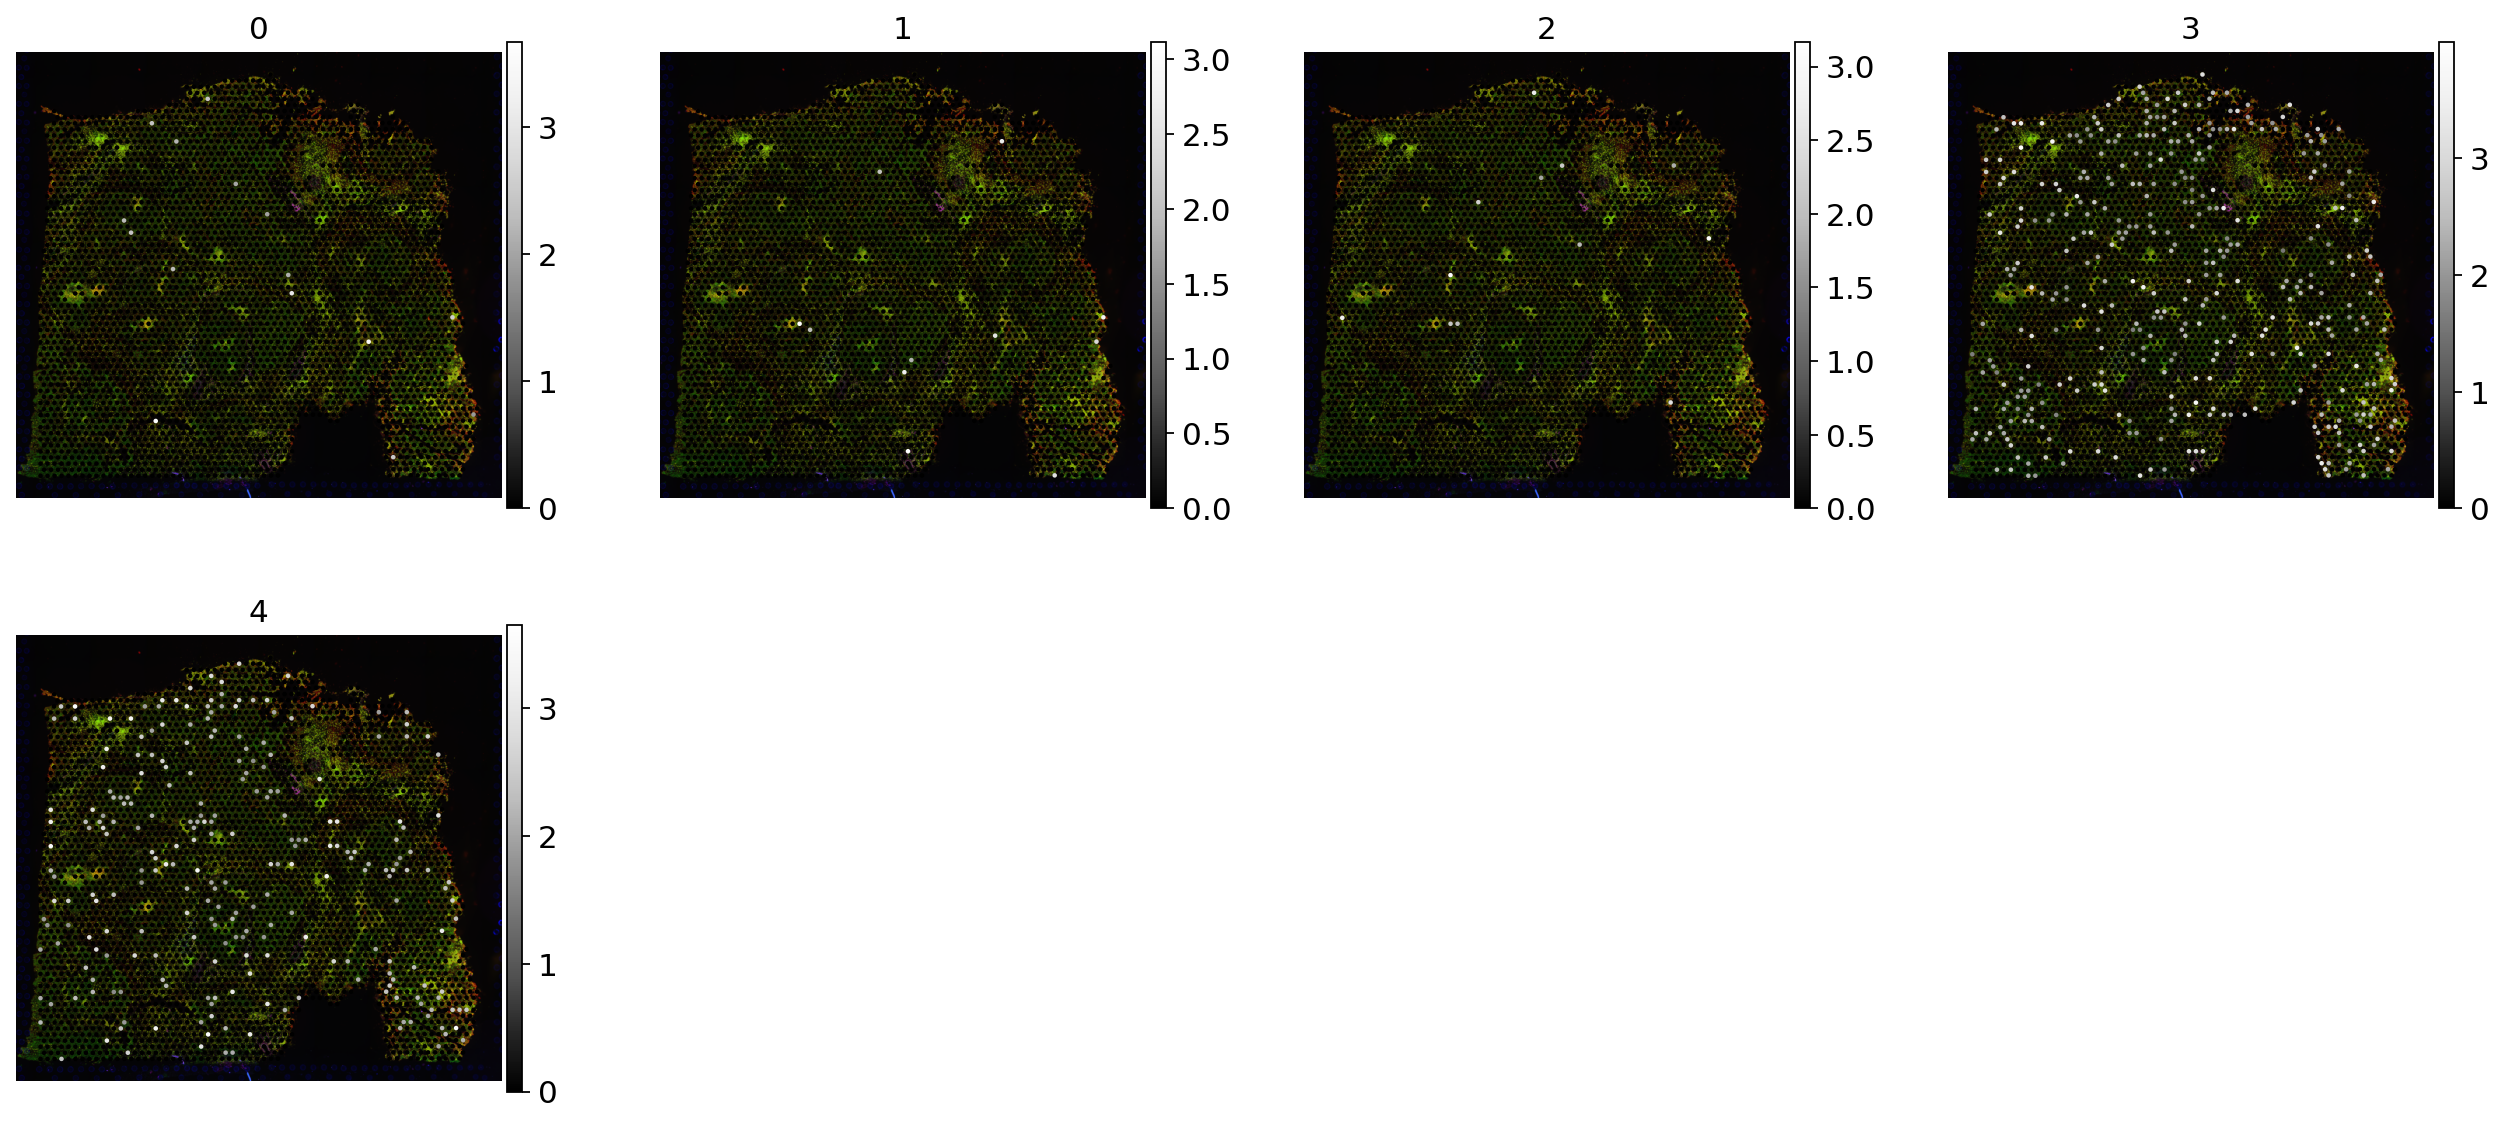

In [ ]:
sc.pl.spatial(st_adata, color = gamma, color_map="Greys_r")

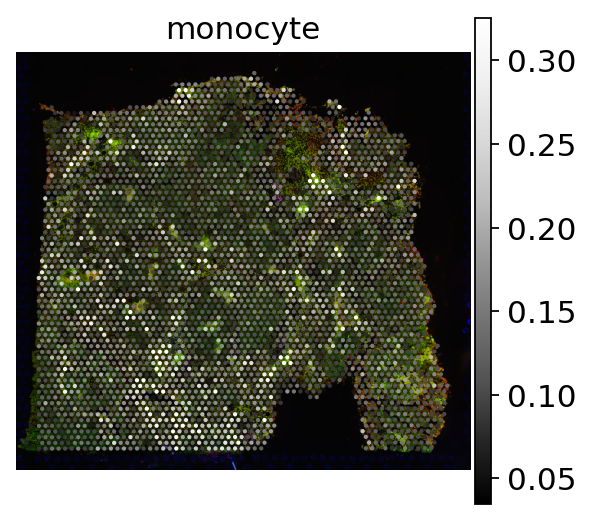

In [ ]:
sc.pl.spatial(st_adata,color="monocyte", color_map="Greys_r")

In [ ]:
st_adata.obs.head()

in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               2460   
AAACACCAATAACTGC-1          1         59         19               3842   
AAACAGGGTCTATATT-1          1         47         13               3840   
AAACATTTCCCGGATT-1          1         61         97               2638   
AAACCCGAACGAAATC-1          1         45        115               3770   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 7.808323        4752.0            8.466532   
AAACACCAATAACTGC-1                 8.254009       10543.0            9.263312   
AAACAGGGTCTATATT-1                 8.253488       10174.0            9.227689   
AAACATTTCCCGGATT-1                 7.878155        5198.0            8.556222   
AAACCCGAACGAAATC-1                 8.235095        8803.0            9.082961   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   23.106061                    31.439394   
AAACACCAATAACTGC-1                   29.887129                    38.594328   
AAACAGGGTCTATATT-1                   26.567722                    34.824061   
AAACATTTCCCGGATT-1                   22.912659                    30.377068   
AAACCCGAACGAAATC-1                   18.118823                    26.684085   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAAGTATCTCCCA-1                    40.551347                    55.239899   
AAACACCAATAACTGC-1                    46.618610                    57.839325   
AAACAGGGTCTATATT-1                    42.815019                    55.258502   
AAACATTTCCCGGATT-1                    39.399769                    53.982301   
AAACCCGAACGAAATC-1                    35.681018                    49.733046   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACAAGTATCTCCCA-1            393.0               5.976351       8.270202   
AAACACCAATAACTGC-1           1436.0               7.270313      13.620413   
AAACAGGGTCTATATT-1           1300.0               7.170888      12.777668   
AAACATTTCCCGGATT-1            477.0               6.169611       9.176607   
AAACCCGAACGAAATC-1            190.0               5.252274       2.158355   

                    n_counts leiden  _indices    B cell  endothelial cell  \
AAACAAGTATCTCCCA-1    4752.0      1         0  0.040861          0.071342   
AAACACCAATAACTGC-1   10543.0      4         1  0.187721          0.060120   
AAACAGGGTCTATATT-1   10174.0      2         2  0.074131          0.065152   
AAACATTTCCCGGATT-1    5198.0      3         3  0.071558          0.195710   
AAACCCGAACGAAATC-1    8803.0      5         4  0.234669          0.090243   

                    monocyte  
AAACAAGTATCTCCCA-1  0.160778  
AAACACCAATAACTGC-1  0.116669  
AAACAGGGTCTATATT-1  0.099105  
AAACATTTCCCGGATT-1  0.095736  
AAACCCGAACGAAATC-1  0.155978